In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.api import OLS

In [2]:
combined = pd.read_csv("./data/combined.csv",
                        parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
2014-01-01 00:00:00+00:00,36012,0.0,32425,8086.0,4.981596,0.0,0.0,0.0364,-1.146,0.0,0.0,0.0056,0.2378,0.9562,1.2539
2014-01-01 01:00:00+00:00,36012,0.0,32425,8803.0,4.932105,0.0,0.0,0.0449,-1.104,0.0,0.0,0.0074,0.2428,0.9672,1.2535
2014-01-01 02:00:00+00:00,36012,0.0,32425,8970.0,4.865019,0.0,0.0,0.0513,-1.059,0.0,0.0,0.0129,0.2521,0.9733,1.2530
2014-01-01 03:00:00+00:00,36012,0.0,32425,8510.0,4.842338,0.0,0.0,0.0544,-0.926,0.0,0.0,0.0140,0.2642,0.9651,1.2523
2014-01-01 04:00:00+00:00,36012,0.0,32425,8360.0,4.772505,0.0,0.0,0.0512,-0.746,0.0,0.0,0.0144,0.2764,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634,0.0,49021,15303.0,4.212916,0.0,0.0,0.0098,-1.970,0.0,0.0,0.0017,0.0931,0.5102,1.2751
2016-12-31 20:00:00+00:00,40634,0.0,49021,15354.0,4.287475,0.0,0.0,0.0099,-2.130,0.0,0.0,0.0020,0.0944,0.5235,1.2756
2016-12-31 21:00:00+00:00,40634,0.0,49021,14848.0,4.296530,0.0,0.0,0.0093,-2.293,0.0,0.0,0.0020,0.0959,0.5248,1.2759
2016-12-31 22:00:00+00:00,40634,0.0,49021,15056.0,4.419977,0.0,0.0,0.0093,-2.443,0.0,0.0,0.0021,0.0973,0.5319,1.2760


In [3]:
wind = combined[['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
wind

,wind_generation_actual,wind_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density
2014-01-01 00:00:00+00:00,8086.0,32425,4.981596,0.0,0.0,0.0,0.0,0.0364,0.0056,0.9562,1.2539
2014-01-01 01:00:00+00:00,8803.0,32425,4.932105,0.0,0.0,0.0,0.0,0.0449,0.0074,0.9672,1.2535
2014-01-01 02:00:00+00:00,8970.0,32425,4.865019,0.0,0.0,0.0,0.0,0.0513,0.0129,0.9733,1.2530
2014-01-01 03:00:00+00:00,8510.0,32425,4.842338,0.0,0.0,0.0,0.0,0.0544,0.0140,0.9651,1.2523
2014-01-01 04:00:00+00:00,8360.0,32425,4.772505,0.0,0.0,0.0,0.0,0.0512,0.0144,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,15303.0,49021,4.212916,0.0,0.0,0.0,0.0,0.0098,0.0017,0.5102,1.2751
2016-12-31 20:00:00+00:00,15354.0,49021,4.287475,0.0,0.0,0.0,0.0,0.0099,0.0020,0.5235,1.2756
2016-12-31 21:00:00+00:00,14848.0,49021,4.296530,0.0,0.0,0.0,0.0,0.0093,0.0020,0.5248,1.2759
2016-12-31 22:00:00+00:00,15056.0,49021,4.419977,0.0,0.0,0.0,0.0,0.0093,0.0021,0.5319,1.2760


# Forecast wind power generation at (t+x) h with x: 1-6

In [5]:
wind['wind_generation_t+1'] = wind['wind_generation_actual'].shift(periods=1)
wind['wind_generation_t+2'] = wind['wind_generation_actual'].shift(periods=2)
wind['wind_generation_t+3'] = wind['wind_generation_actual'].shift(periods=3)
wind['wind_generation_t+4'] = wind['wind_generation_actual'].shift(periods=4)
wind['wind_generation_t+5'] = wind['wind_generation_actual'].shift(periods=5)
wind['wind_generation_t+6'] = wind['wind_generation_actual'].shift(periods=6)

<ipython-input-5-17bf69ed8cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['wind_generation_t+1'] = wind['wind_generation_actual'].shift(periods=1)
<ipython-input-5-17bf69ed8cf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['wind_generation_t+2'] = wind['wind_generation_actual'].shift(periods=2)
<ipython-input-5-17bf69ed8cf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [7]:
# Drop the first 6 rows of the DataFrame since we cannot have all the values for 'wind_generation_t+n' for (n:1-6)
wind = wind.drop(wind.index[[0,1,2,3,4,5]])
wind

,wind_generation_actual,wind_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density,wind_generation_t+1,wind_generation_t+2,wind_generation_t+3,wind_generation_t+4,wind_generation_t+5,wind_generation_t+6
2014-01-01 06:00:00+00:00,8232.0,32425,4.721993,0.000000,0.000000,0.0000,0.0002,0.0363,0.0124,0.8494,1.2499,8047.0,8360.0,8510.0,8970.0,8803.0,8086.0
2014-01-01 07:00:00+00:00,8380.0,32425,4.700023,0.323852,6.253148,7.1995,31.7764,0.0293,0.0110,0.7921,1.2491,8232.0,8047.0,8360.0,8510.0,8970.0,8803.0
2014-01-01 08:00:00+00:00,8084.0,32425,4.944501,5.235753,47.153647,49.7607,172.1293,0.0248,0.0071,0.7230,1.2474,8380.0,8232.0,8047.0,8360.0,8510.0,8970.0
2014-01-01 09:00:00+00:00,7011.0,32425,4.995092,19.293887,93.149513,102.8407,292.4387,0.0158,0.0036,0.6537,1.2445,8084.0,8380.0,8232.0,8047.0,8360.0,8510.0
2014-01-01 10:00:00+00:00,6630.0,32425,4.943888,45.055446,122.060754,150.7383,363.5863,0.0092,0.0018,0.5824,1.2405,7011.0,8084.0,8380.0,8232.0,8047.0,8360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,15303.0,49021,4.212916,0.000000,0.000000,0.0000,0.0000,0.0098,0.0017,0.5102,1.2751,15196.0,14836.0,14072.0,13234.0,12394.0,11522.0
2016-12-31 20:00:00+00:00,15354.0,49021,4.287475,0.000000,0.000000,0.0000,0.0000,0.0099,0.0020,0.5235,1.2756,15303.0,15196.0,14836.0,14072.0,13234.0,12394.0
2016-12-31 21:00:00+00:00,14848.0,49021,4.296530,0.000000,0.000000,0.0000,0.0000,0.0093,0.0020,0.5248,1.2759,15354.0,15303.0,15196.0,14836.0,14072.0,13234.0
2016-12-31 22:00:00+00:00,15056.0,49021,4.419977,0.000000,0.000000,0.0000,0.0000,0.0093,0.0021,0.5319,1.2760,14848.0,15354.0,15303.0,15196.0,14836.0,14072.0


# Split dataset into training and test

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(wind, test_size=.2, random_state=3)

X_train = train[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

# 1. Forecasting the wind generation using the LinearRegression model

In [15]:
# Create a list to iterate through and train and validate the models for each duration: t+1h, t+2h, t+3h, etc.
y_list =['wind_generation_t+1', 
         'wind_generation_t+2', 
         'wind_generation_t+3', 
         'wind_generation_t+4',
         'wind_generation_t+5',
         'wind_generation_t+6']

### 1.1 Training and validation of the LinearRegression model for all features (n=11)

#### Cross-validation
In order to evaluate the performance of the algorithm, we divide the data using a procedure called cross-validation (cv for short). For the k-fold cv, the dataset is split into k smaller sets or ‘folds’, the model is trained in k-1 of those folds, and the resulting model is validated on the remaining part of the data. The performance measure provided by the cv is then the average of the performance measure computed in each experiment. 
In the code below, we use cross_val_score from sklearn.model_selection, with number of folds cv=5

The performance measure that LinearRegression gives by default is the coefficient of determination R² of the prediction. It measures how well the predictions approximate the true values.

In [16]:
# we train and validate the LinearRegression for all forecast durations (1 to 6h)
lr = LinearRegression()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.990

The average score linear regression for t+2h is: 0.966
The R2 score of the linear regression model for t+2h is r2 = 0.966

The average score linear regression for t+3h is: 0.933
The R2 score of the linear regression model for t+3h is r2 = 0.935

The average score linear regression for t+4h is: 0.895
The R2 score of the linear regression model for t+4h is r2 = 0.899

The average score linear regression for t+5h is: 0.856
The R2 score of the linear regression model for t+5h is r2 = 0.861

The average score linear regression for t+6h is: 0.817
The R2 score of the linear regression model for t+6h is r2 = 0.824


In [17]:
# Let's get a summary on how the model fits for t+1h
OLS(train['wind_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     wind_generation_t+1   R-squared (uncentered):                   0.996
Model:                             OLS   Adj. R-squared (uncentered):              0.996
Method:                  Least Squares   F-statistic:                          4.612e+05
Date:                 Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                         23:11:46   Log-Likelihood:                     -1.6633e+05
No. Observations:                21024   AIC:                                  3.327e+05
Df Residuals:                    21013   BIC:                                  3.328e+05
Df Model:                           11                                                  
Covariance Type:             nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
wind_generation_actual           0.9699      0.002    536.041      0.000       0.966       0.973
wind_capacity                    0.0080      0.001      7.627      0.000       0.006       0.010
windspeed_10m                  102.5966      6.852     14.974      0.000      89.167     116.026
radiation_direct_horizontal      0.6379      0.097      6.568      0.000       0.448       0.828
radiation_diffuse_horizontal    -0.7899      0.154     -5.137      0.000      -1.091      -0.488
irradiance_surface              -2.6942      0.187    -14.439      0.000      -3.060      -2.328
irradiance_toa                   1.2567      0.110     11.397      0.000       1.041       1.473
precipitation                 -520.5460     43.625    -11.932      0.000    -606.053    -435.038
snowfall                       926.9850    207.597      4.465      0.000     520.079    1333.891
cloud_cover                   -141.6755     22.796     -6.215      0.000    -186.358     -96.993
air_density                   -273.9053     42.652     -6.422      0.000    -357.506    -190.304
==============================================================================
Omnibus:                     1495.412   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7543.453
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                       5.925   Cond. No.                     1.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

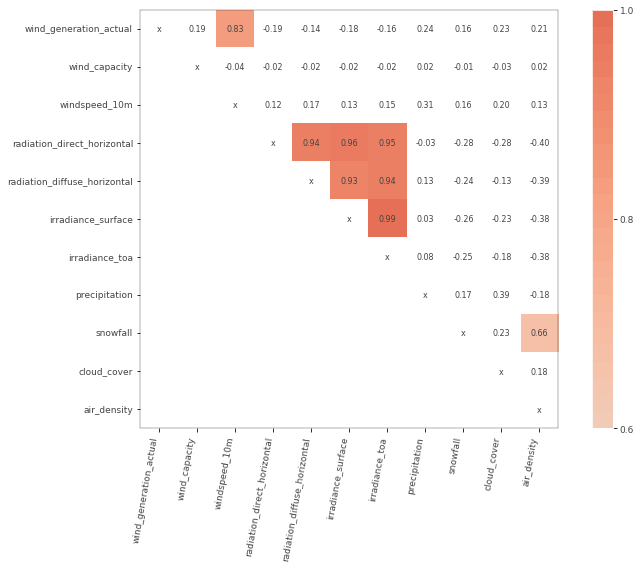

In [18]:
# Let's check for multicollinearity amongst the different features
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

- It seems that there is a strong multicollinearity between the different features for solar radiation/irradiance.
- Based on the findings derived from the models developed for the forecasting of solar power generation based on weather data at time t, we know that the feature 'irradiance_surface' was the most important feature to forecast solar power generation.
- Thus we decide to re-train and validate the models by limiting the features to: 
#### `wind_generation_actual`, `wind_capacity`,`windspeed_10m`, `irradiance_surface`, `precipitation`, `snowfall`, `cloud_cover`, `air_density`
#### `wind_generation_actual` and `irradiance_surface` 

### 1.2 Training and validation of the LinearRegression model for selected features (n=8)

In [19]:
X_train = train[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [20]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.990

The average score linear regression for t+2h is: 0.966
The R2 score of the linear regression model for t+2h is r2 = 0.966

The average score linear regression for t+3h is: 0.932
The R2 score of the linear regression model for t+3h is r2 = 0.934

The average score linear regression for t+4h is: 0.895
The R2 score of the linear regression model for t+4h is r2 = 0.898

The average score linear regression for t+5h is: 0.855
The R2 score of the linear regression model for t+5h is r2 = 0.860

The average score linear regression for t+6h is: 0.815
The R2 score of the linear regression model for t+6h is r2 = 0.822


In [21]:
# Let's get a summary on how the model fits for t+1h
OLS(train['wind_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     wind_generation_t+1   R-squared (uncentered):                   0.996
Model:                             OLS   Adj. R-squared (uncentered):              0.996
Method:                  Least Squares   F-statistic:                          6.295e+05
Date:                 Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                         23:15:55   Log-Likelihood:                     -1.6640e+05
No. Observations:                21024   AIC:                                  3.328e+05
Df Residuals:                    21016   BIC:                                  3.329e+05
Df Model:                            8                                                  
Covariance Type:             nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wind_generation_actual     0.9656      0.002    560.660      0.000       0.962       0.969
wind_capacity              0.0094      0.001      9.142      0.000       0.007       0.011
windspeed_10m            119.9773      6.498     18.465      0.000     107.242     132.713
irradiance_surface        -0.5405      0.026    -20.928      0.000      -0.591      -0.490
precipitation           -407.2177     42.390     -9.607      0.000    -490.305    -324.131
snowfall                 786.2406    206.715      3.804      0.000     381.064    1191.417
cloud_cover              -76.2917     21.716     -3.513      0.000    -118.857     -33.727
air_density             -369.4830     41.180     -8.972      0.000    -450.200    -288.766
==============================================================================
Omnibus:                     1502.381   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7494.018
Skew:                          -0.130   Prob(JB):                         0.00
Kurtosis:                       5.913   Cond. No.                     1.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.3 Training and validation of the LinearRegression model for selected features (n=2)

In [22]:
X_train = train[['wind_generation_actual', 'windspeed_10m']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'windspeed_10m']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [23]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.990

The average score linear regression for t+2h is: 0.965
The R2 score of the linear regression model for t+2h is r2 = 0.965

The average score linear regression for t+3h is: 0.931
The R2 score of the linear regression model for t+3h is r2 = 0.932

The average score linear regression for t+4h is: 0.892
The R2 score of the linear regression model for t+4h is r2 = 0.896

The average score linear regression for t+5h is: 0.852
The R2 score of the linear regression model for t+5h is r2 = 0.857

The average score linear regression for t+6h is: 0.812
The R2 score of the linear regression model for t+6h is r2 = 0.819


In [24]:
# Let's get a summary on how the model fits for t+1h
OLS(train['wind_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     wind_generation_t+1   R-squared (uncentered):                   0.996
Model:                             OLS   Adj. R-squared (uncentered):              0.996
Method:                  Least Squares   F-statistic:                          2.453e+06
Date:                 Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                         23:17:32   Log-Likelihood:                     -1.6668e+05
No. Observations:                21024   AIC:                                  3.334e+05
Df Residuals:                    21022   BIC:                                  3.334e+05
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wind_generation_actual     0.9893      0.001    857.641      0.000       0.987       0.992
windspeed_10m             21.7185      2.646      8.209      0.000      16.533      26.904
==============================================================================
Omnibus:                     1531.555   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7934.743
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                       6.001   Cond. No.                     5.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.4 Training and validation of the LinearRegression model for most important feature: `wind_generation_actual`

In [25]:
X_train = train[['wind_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [26]:
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2) 


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.990

The average score linear regression for t+2h is: 0.965
The R2 score of the linear regression model for t+2h is r2 = 0.965

The average score linear regression for t+3h is: 0.931
The R2 score of the linear regression model for t+3h is r2 = 0.932

The average score linear regression for t+4h is: 0.892
The R2 score of the linear regression model for t+4h is r2 = 0.896

The average score linear regression for t+5h is: 0.852
The R2 score of the linear regression model for t+5h is r2 = 0.857

The average score linear regression for t+6h is: 0.812
The R2 score of the linear regression model for t+6h is r2 = 0.819


In [27]:
# Let's get a summary on how the model fits for t+1h
OLS(train['wind_generation_t+1'],X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     wind_generation_t+1   R-squared (uncentered):                   0.996
Model:                             OLS   Adj. R-squared (uncentered):              0.996
Method:                  Least Squares   F-statistic:                          4.891e+06
Date:                 Wed, 20 May 2020   Prob (F-statistic):                        0.00
Time:                         23:18:23   Log-Likelihood:                     -1.6671e+05
No. Observations:                21024   AIC:                                  3.334e+05
Df Residuals:                    21023   BIC:                                  3.334e+05
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wind_generation_actual     0.9980      0.000   2211.586      0.000       0.997       0.999
==============================================================================
Omnibus:                     1610.463   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8228.628
Skew:                          -0.174   Prob(JB):                         0.00
Kurtosis:                       6.045   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Forecasting the wind generation using the RandomForestRegression model

### 2.1 Training and validation of the RandomForestRegression model for all features (n=11)

In [29]:
X_train = train[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [30]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.990
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.991

The average score for random forest regression (100 decisions trees) and t+2h is: 0.970
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.971

The average score for random forest regression (100 decisions trees) and t+3h is: 0.946
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.950

The average score for random forest regression (100 decisions trees) and t+4h is: 0.922
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.930

The average score for random forest regression (100 decisions trees) and t+5h is: 0.900
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.911

The average score for random forest regression (100 decisions trees) and t+6h is: 0.

### 2.2 Training and validation of the RandomForestRegression model for selected features (n=8)

In [31]:
X_train = train[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [32]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.990
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.990

The average score for random forest regression (100 decisions trees) and t+2h is: 0.969
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.970

The average score for random forest regression (100 decisions trees) and t+3h is: 0.945
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.949

The average score for random forest regression (100 decisions trees) and t+4h is: 0.921
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.929

The average score for random forest regression (100 decisions trees) and t+5h is: 0.900
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.910

The average score for random forest regression (100 decisions trees) and t+6h is: 0.

### 2.3 Training and validation of the RandomForestRegression model for selected features (n=2)

In [33]:
X_train = train[['wind_generation_actual', 'windspeed_10m']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'windspeed_10m']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [34]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.988
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.988

The average score for random forest regression (100 decisions trees) and t+2h is: 0.958
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.959

The average score for random forest regression (100 decisions trees) and t+3h is: 0.918
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.920

The average score for random forest regression (100 decisions trees) and t+4h is: 0.873
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.878

The average score for random forest regression (100 decisions trees) and t+5h is: 0.828
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.833

The average score for random forest regression (100 decisions trees) and t+6h is: 0.

### 2.4 Training and validation of the RandomForestRegression model for most important feature: `wind_generation_actual`

In [35]:
X_train = train[['wind_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [36]:
rf = RandomForestRegressor()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decisions trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    rf.fit(X_train, train[y_list[i]])
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2) 


The average score for random forest regression (100 decisions trees) and t+1h is: 0.985
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.986

The average score for random forest regression (100 decisions trees) and t+2h is: 0.950
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.952

The average score for random forest regression (100 decisions trees) and t+3h is: 0.902
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.905

The average score for random forest regression (100 decisions trees) and t+4h is: 0.847
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.851

The average score for random forest regression (100 decisions trees) and t+5h is: 0.791
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.795

The average score for random forest regression (100 decisions trees) and t+6h is: 0.